# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 2

Do wykonania zadań proszę zapoznać się z metodami, właściwościami, oraz funkcjami:
`__repr__`, `__str__`, `__add__`, `__sub__`, `__eq__`, `__lt__`, `__gt__`, `__le__`, `__ge__`, `__ne__`, `__hash__`, `__truediv__`, `__mul__`, `__class__`, `__name__`, `id`.

Operatory: https://docs.python.org/3/library/operator.html


**UWAGA**: W niniejszym laboratorium proszę nie korzystać z zewnętrzych modułów/bibliotek (poza biblioteką _matplotlib_).

**UWAGA 2**: Obsługę błędów należy zrealizować w postaci wyjątków.

### Zadanie 1

Napisz klasę `Vector` udostępniającą funkcjonalność:
- reprezentuje wektor dowolnej długości,
- obiekt inicjowany listą (np. `Vector([1, 2, 3])`,
- posiada funkcję zwracającą moduł wektora,
- umożliwia dodawanie (`+`) i odejmowanie (`-`) wektorów. Dodaj obsługę błędów (różna długość (liczba elementów) wektora),
- możliwość wyświetlenia wektora jako listy za pomocą funkcji `print(v)` (metoda `__str__`),
- uruchomienie komórki zawierającej jedynie nazwę zmiennej (typu `Vector`) spowoduje wyświetlenie nazwy typu `Vector`, adresu zmiennej w pamięci (funkcja `id`) oraz jej zawartości, np. `<Vector([1, 2, 3]) at 140185630442880>` (metoda `__repr__`)

In [96]:
# <UZUPEŁNIJ>
import math
import operator
import matplotlib.pyplot as plt

class Vector: 
    
    def __init__(self, vector):
        self.values = vector

    def __str__(self):
        return str(self.values)

    def module(self):
        return math.sqrt(sum(num ** 2 for num in self.values))

    def __add__(self, vector):
        if len(self.values) != len(vector.values):
            raise ValueError("Vectors must be of the same length")
        return Vector([a + b for a, b in zip(self.values, vector.values)])

    def __sub__(self, vector):
        if len(self.values) != len(vector.values):
            raise ValueError("Vectors must be of the same length")
        return Vector([a - b for a, b in zip(self.values, vector.values)])

    def __repr__(self):
        return f"<{self.__class__.__name__}({self.values}) at {id(self)}>"

    ## ZADANIE 2
    def __eq__(self, vector):
        if len(self.values) != len(vector.values):
            raise ValueError("Vectors must be of the same length")
        return Vector([a == b for a, b in zip(self.values, vector.values)])

    def __ne__(self, vector):
        if len(self.values) != len(vector.values):
            raise ValueError("Vectors must be of the same length")
        return Vector([a != b for a, b in zip(self.values, vector.values)])

    def __lt__(self, vector):
        if len(self.values) != len(vector.values):
            raise ValueError("Vectors must be of the same length")
        return Vector([a < b for a, b in zip(self.values, vector.values)])
    
    def __le__(self, vector):
        if len(self.values) != len(vector.values):
            raise ValueError("Vectors must be of the same length")
        return Vector([a <= b for a, b in zip(self.values, vector.values)])
    
    def __gt__(self, vector):
        if len(self.values) != len(vector.values):
            raise ValueError("Vectors must be of the same length")
        return Vector([a > b for a, b in zip(self.values, vector.values)])
    
    def __ge__(self, vector):
        if len(self.values) != len(vector.values):
            raise ValueError("Vectors must be of the same length")
        return Vector([a >= b for a, b in zip(self.values, vector.values)])

    ## ZADANIE 3:
    def plot(self):
        if len(self.values) != 2:
            raise ValueError("Plotting is only supported for 2D vectors.")
        plt.figure()
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.arrow(0, 0, self.values[0], self.values[1], head_width=0.2, head_length=0.2, fc='blue', ec='blue')
        plt.xlim(min(0, self.values[0]) - 1, max(0, self.values[0]) + 1)
        plt.ylim(min(0, self.values[1]) - 1, max(0, self.values[1]) + 1)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Vector Representation")
        plt.show()

    ## ZADANIE 4:
    def __hash__(self):
        return hash(tuple(self.values))

    ## ZADANIE 5:
    def __truediv__(self, value):
        if not isinstance(value, (int, float)):
            raise TypeError("Can only divide by a scalar (int or float)")
        if value == 0:
            raise ValueError("Cannot divide by zero")
        return Vector([a / value for a in self.values])
        
    def __mul__(self, value):
        if not isinstance(value, (int, float)):
            raise TypeError("Can only divide by a scalar (int or float)")
        return Vector([a * value for a in self.values])


a = Vector([2,3])
print(a)
print(a.module())
b = Vector([3, 5])
a = a + b
print(a)
a

[2, 3]
3.605551275463989
[5, 8]


<Vector([5, 8]) at 2355519463872>

### Zadanie 2

Do wcześniej zaimplementowanej klasy dopisz funkcje pozwalające na porównanie wektorów za pomocą operatorów: `==`, `>=`, `<=`, `>`, `<`, `!=`. Porównanie ma zostać wykonane na poziomie elementów wektorów (_element wise_), poniżej przykład:

```ipython
 In [1]: a = Vector([1, 2, 3]) \
    ...: b = Vector([3, 2, 1]) \
    ...: a <= b
Out [1]: <Vector([True, True, False]) at 140185575662832>
```

In [100]:
# <UZUPEŁNIJ>
a = Vector([2, 3])
b = Vector([3, 2])
c = Vector([3, 2])
print(a == b)
print(b == c)
print(b != c)
print(a > b)
print(a >= b)
print(a < b)
print(a <= b)
a <= b

[False, False]
[True, True]
[False, False]
[False, True]
[False, True]
[True, False]
[True, False]


<Vector([True, False]) at 2355514524336>

### Zadanie 3

Napisz funkcję umożliwiającą wyświetlenie wektora (`Vector`) zaczepionego w punkcie (0,0) na wykresie (zaimplementuj wyświetlanie za pomocą biblioteki `matplotlib`. 

> **UWAGA**: Funkcja powinna działać tylko dla wektora o dwóch wymiarach (dwuelementowa lista) - wykres 2D i wyświetlać komunikat jeżeli wymiar jest inny.

> Podpowiedź: możesz wykorzystać funkcję [matplotlib.pyplot.arrow](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.arrow.html)

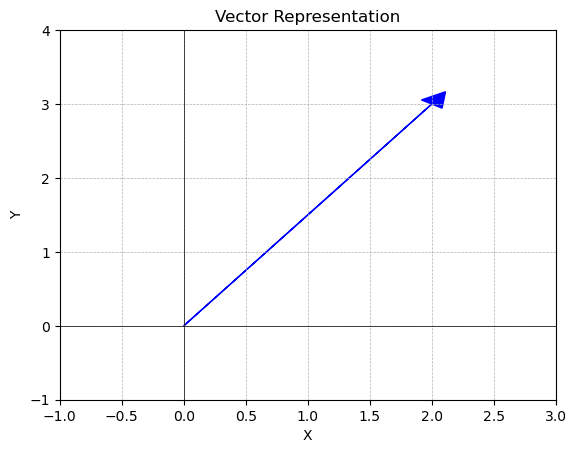

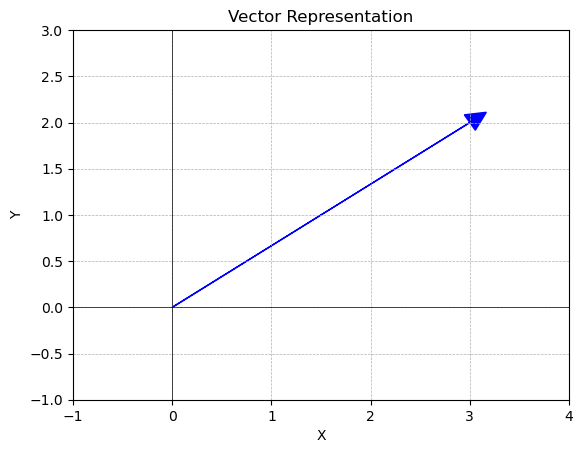

In [84]:
# <UZUPEŁNIJ>
a.plot()
b.plot()

### Zadanie 4

Dodaj możliwość zastosowania obiektu klasy `Vector` jako klucza w słowniku. Np.:

```python
d = {
    Vector([1, 2, 3]): 'Wektor 1',
    Vector([2, 2, 3]): 'Wektor 2'
}
d[Vector([2, 2, 3])]
```

In [87]:
# <UZUPEŁNIJ>
d = {
    Vector([1, 2, 3]): 'Wektor 1',
    Vector([2, 2, 3]): 'Wektor 2'
}
d[Vector([2, 2, 3])]

'Wektor 2'

### Zadanie 5

Dodaj funkcjonalność:
- dzielenia przez skalar (np. `Vector([2, 4]) / 2`),
- mnożenia przez skalar (np. `Vector([2, 4]) * 2`).

> Podpowiedź: Pamiętaj o obsłudze błędów.

In [103]:
# <UZUPEŁNIJ>
print(Vector([2, 4]) / 2)
# print(Vector([2, 4]) / 0)
print(Vector([2, 4]) * 2)
print(Vector([2, 4]) * 'sd')

[1.0, 2.0]
[4, 8]


TypeError: Can only divide by a scalar (int or float)